In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
df = pd.read_csv("EcomCustomersWthNan.csv")

In [178]:
df.isna().any() 

Avg. Session Length     False
Time on App             False
Time on Website          True
Length of Membership    False
Yearly Amount Spent     False
dtype: bool

In [95]:
list(set(df.dtypes.tolist()))
df = df.select_dtypes(include = 'float64')
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


##### Определим функцию smooth для сглаживания исходных данных с использованием свертки

In [96]:
def smooth(y, box_pts):
    box = np.ones(box_pts) / box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

###### Отобразим результаты сглаживания исходных данных

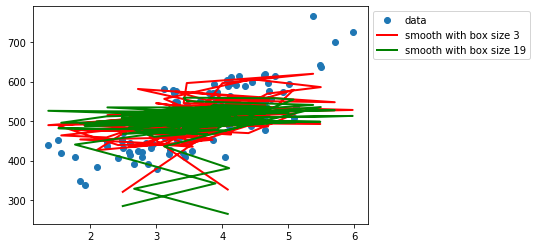

In [97]:
x = df["Length of Membership"]
y = df["Yearly Amount Spent"]
plt.plot(x, y,'o', label='data')
plt.plot(x, smooth(y, 3), 'r-', lw=2, label='smooth with box size 3')
plt.plot(x, smooth(y, 10), 'g-', lw=2, label='smooth with box size 19')
plt.legend(bbox_to_anchor=(1, 1))
plt.show();

##### Kernel Density Estimation

In [98]:
from astropy.modeling.models import Lorentz1D
from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel

###### Создаем синтетические данные, накладывая шум, смоделированный с использованием равномерного распределения

In [120]:
lorentz = Lorentz1D(1, 0, 1)
#x = np.linspace(-5, 5, 100)
x = df["Yearly Amount Spent"]
data_1D = lorentz(x) + 0.1 * (np.random.rand(138) - 0.5)

##### Проведем сглаживание данных с использованием Gaussian1DKernel со стандартным отклонением в 1 пиксель

In [136]:
gauss_kernel = Gaussian1DKernel(1)
smoothed_data_gauss = convolve(data_1D, gauss_kernel)

##### Проведем сглаживание тех же данных с использованием Box1DKernel шириной 2 пикселя 

In [141]:
box_kernel = Box1DKernel(2)
smoothed_data_box = convolve(data_1D, box_kernel)

###### Результаты

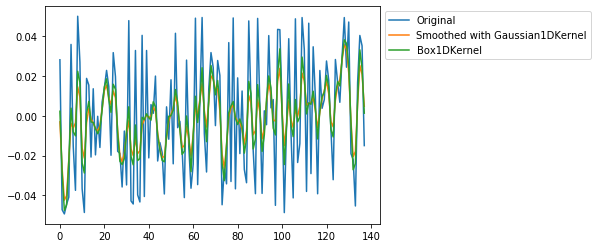

In [142]:
plt.plot(data_1D, label='Original')
plt.plot(smoothed_data_gauss, label='Smoothed with Gaussian1DKernel')
plt.plot(smoothed_data_box, label='Box1DKernel')
plt.legend(bbox_to_anchor=(1, 1))
plt.show();

In [143]:
smoothed = np.convolve(data_1D, box_kernel.array)

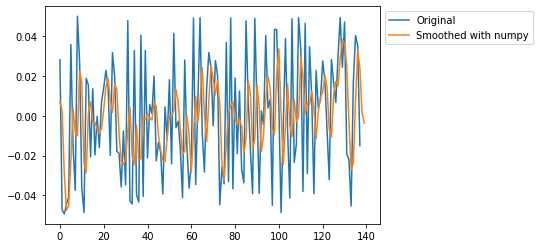

In [144]:
plt.plot(data_1D, label='Original')
plt.plot(smoothed, label='Smoothed with numpy')
plt.legend(bbox_to_anchor=(1, 1))
plt.show();

##### 2D Kernels

In [145]:
from astropy.convolution import convolve, Gaussian2DKernel, Tophat2DKernel
from astropy.modeling.models import Gaussian2D

###### Создадим синтетические данные

In [146]:
gauss = Gaussian2D(1, 0, 0, 3, 3)
# Fake image data including noise
#x = np.arange(-100, 101)
#y = np.arange(-100, 101)
#x, y = np.meshgrid(x, y)
x = df["Length of Membership"]
y = df["Yearly Amount Spent"] 
data_2D = gauss(x, y) + 0.1 * (np.random.rand(138, 138) - 0.5)

###### Проведем сглаживание данных с использованием Gaussian2DKernel со стандартным отклонением в 2 пикселя

In [172]:
gauss_kernel = Gaussian2DKernel(2)
smoothed_data_gauss = convolve(data_2D, gauss_kernel)

###### Проведем сглаживание тех же данных с использованием Tophat2DKernel шириной 5 пикселей

In [173]:
tophat_kernel = Tophat2DKernel(5)
smoothed_data_tophat = convolve(data_2D, tophat_kernel)

######  Результаты

In [174]:
import seaborn as sns

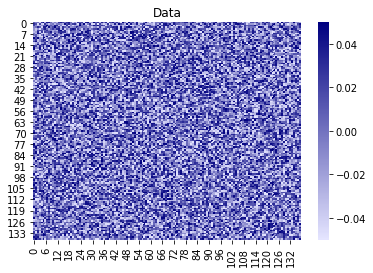

In [175]:
pal = sns.light_palette("navy", as_cmap=True)

ax = plt.axes()
sns.heatmap(data_2D, ax=ax, cmap=pal)
ax.set_title('Data')
plt.show();

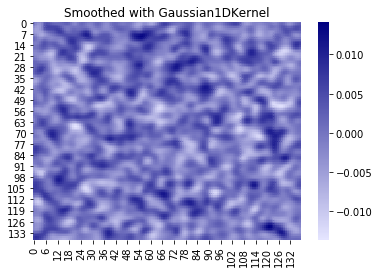

In [176]:
ax = plt.axes()
sns.heatmap(smoothed_data_gauss, ax=ax, cmap=pal)
ax.set_title('Smoothed with Gaussian1DKernel')
plt.show();

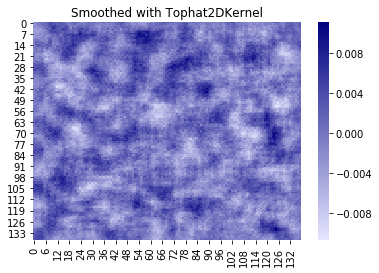

In [177]:
ax = plt.axes()
sns.heatmap(smoothed_data_tophat, ax=ax, cmap=pal)
ax.set_title('Smoothed with Tophat2DKernel')
plt.show();